Arbol de decisiones

In [40]:
#Carga y ejecucion de librerias para la construccion del algoritmo

import pandas as pd    # Libreria de manipulación de datos en Python para datos tabulares
import numpy as np    # librería de Python especializada en el cálculo numérico y el análisis de datos
import seaborn as sns    # Libreria para crear o hacer esquemas gráficos estadísticos en Python
import matplotlib.pyplot as plt    #librería de Python especializada en la creación de Esquemas gráficos en dos dimensiones

from sklearn import metrics    #librería de Python utilizada para implementar modelos de ciencia de datos con  Metricas
from sklearn.model_selection import train_test_split    #Libreria que permite hacer una división de un conjunto de datos en dos bloques de entrenamiento y prueba de un modelo
from sklearn.tree import DecisionTreeClassifier, plot_tree   #clase capaz de realizar una clasificación de múltiples clases en un conjunto de datos -> Arbol de decisiones
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  #Clase que evalúa la calidad de las predicciones positivas o Negativas


In [ ]:
#Cargado y Lectura de la Base de datos
BBDD = ('H:/Segundo Semestre/Analisis de datos/Trabajos/BBDD.csv')
Datos_Vino = pd.read_csv(BBDD, index_col=0, sep=';', encoding='latin-1')


In [38]:
# Consulta mas investigacion de datos o registros Almacenados en la Base de datos pero solamente 20 Registros de 1252 Registros
Datos_Vino.head(20)


,acidez_volátil,ácido_cítrico,azúcar_residual,cloruros,dióxido_azufre_libre,dióxido_azufre_total,Dencidad,Ph,sulfatos,Alcohol,Calidad
acidez_fija,,,,,,,,,,,
74,7,0,19,76,110,340,9978,351,56,94,5
78,88,0,26,98,250,670,9968,32,68,98,5
78,76,4,23,92,150,540,997,326,65,98,5
112,28,56,19,75,170,600,998,316,58,98,6
74,7,0,19,76,110,340,9978,351,56,94,5
74,66,0,18,75,130,400,9978,351,56,94,5
79,6,6,16,69,150,590,9964,33,46,94,5
73,65,0,12,65,150,210,9946,339,47,100,7
78,58,2,20,73,90,180,9968,336,57,95,7


In [42]:
# Descripción de los datos esta consulta devuelve información estadística de los datos del dataframe
# Esta información incluye el número de muestras, el valor medio, la desviación estándar, el valor mínimo, máximo, la mediana
# y los valores correspondientes a los percentiles 25%, 50% y 75%

Datos_Vino.describe()


,acidez_volátil,ácido_cítrico,azúcar_residual,dióxido_azufre_libre,dióxido_azufre_total,Ph,sulfatos,Calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,123.861789,24.457786,29.522201,158.749218,464.677924,297.103815,59.713571,5.636023
std,221.334753,19.962526,41.537631,104.601570,328.953245,96.075959,24.155224,0.807569
min,2.000000,0.000000,9.000000,10.000000,60.000000,29.000000,4.000000,3.000000
25%,35.000000,5.000000,19.000000,70.000000,220.000000,316.000000,53.000000,5.000000
50%,49.000000,23.000000,22.000000,140.000000,380.000000,329.000000,61.000000,6.000000
75%,65.000000,41.000000,26.000000,210.000000,620.000000,339.000000,72.000000,6.000000
max,1185.000000,79.000000,655.000000,720.000000,2890.000000,401.000000,198.000000,8.000000


In [44]:
#Funcion que se utiliza para comprobar los valores faltantes en un DataFrame
#Devuelve un objeto DataFrame del mismo tamaño, donde los valores se reemplazan con un valor booleano True por cada valor de 0 o Null 
Datos_Vino.isna().sum()


acidez_volátil          0
ácido_cítrico           0
azúcar_residual         0
cloruros                0
dióxido_azufre_libre    0
dióxido_azufre_total    0
Dencidad                0
Ph                      0
sulfatos                0
Alcohol                 0
Calidad                 0
dtype: int64

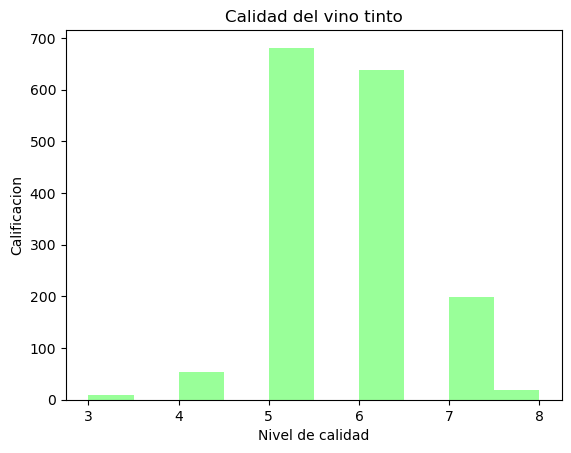

In [46]:
#Agrupamiento de clases de Vinos de acuerdo a su Nivel de calidad

plt.hist(Datos_Vino.Calidad,color='#99FF99')
plt.title('Calidad del vino tinto')
plt.xlabel('Nivel de calidad')
plt.ylabel('Calificacion')
plt.show()



se observa como el Nivel 5 de calidad de vino alcanza el primer puesto con una puntuacion o calificacion de 690 o 695

<Axes: xlabel='acidez_fija', ylabel='dióxido_azufre_libre'>

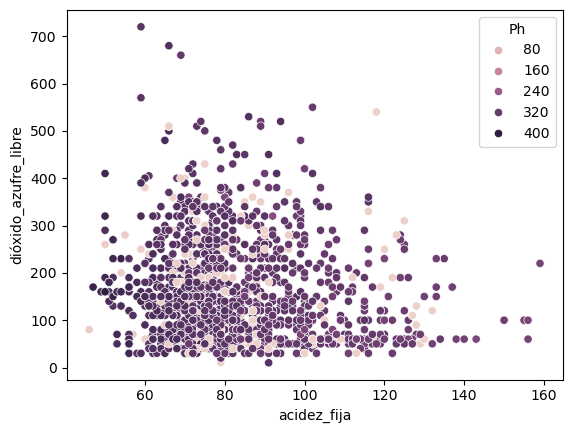

In [48]:
sns.scatterplot(x="acidez_fija", y="dióxido_azufre_libre", hue="Ph", data = Datos_Vino)

SE logra observar mas establecer como de acuerdo al Ph del vino, el vino de tipo "dióxido_azufre_libre" alcanza
una puntuacion de calificacion sobre los "550" y el de "Acidez fija" una puntuacion de calificacion sobre los "710"


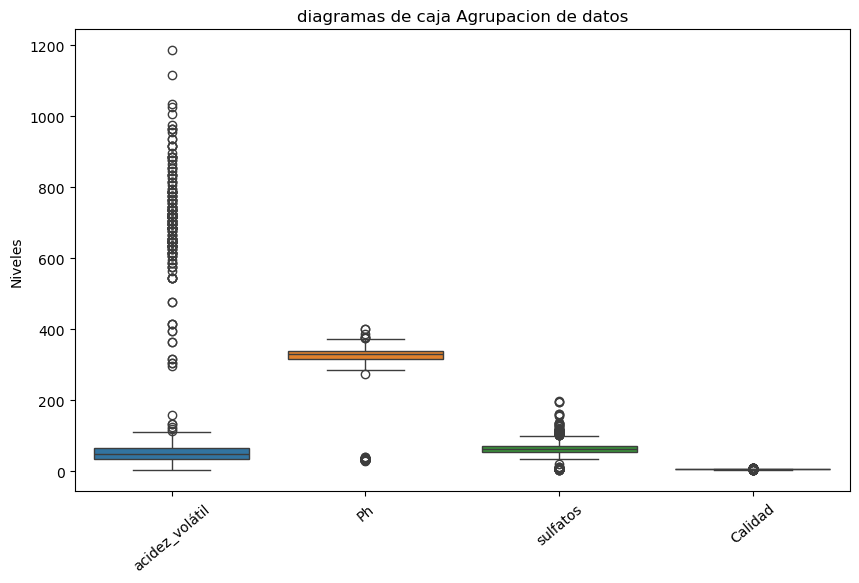

In [50]:
##Identificación de Datos Atípicos

plt.figure(figsize=(10, 6))
sns.boxplot(data=Datos_Vino[['acidez_volátil','Ph','sulfatos','Calidad']])
plt.xticks(rotation=40)
plt.title('diagramas de caja Agrupacion de datos')
plt.ylabel('Niveles')
plt.show()

En la anterior grafica se logra observar como la clase de vino llamada (acidez_volátil) supera en valores o en datos atipicos Positivos a los tipos de vino llamados (Ph,Sulfatos), ya que comunmente este vino de tipo "Acidez_volatil" contiene en sus registros un valor maximo o mayor de '1185.000000'
y un valor menor de '2.0' mas una mediana de '123.8'

In [52]:
#Prediccion de datos
predictors_col = ["acidez_volátil", "dióxido_azufre_total", "sulfatos", "Calidad"]
target_col = ['Ph']

In [54]:
Datos_de_prediccion = Datos_Vino[predictors_col]
target = Datos_Vino[target_col]

In [56]:
#esto aca es un proceso matemático que se utiliza para predecir eventos o resultados futuros mediante el análisis de patrones
#en un conjunto determinado de datos de entrada
Datos_de_prediccion

,acidez_volátil,dióxido_azufre_total,sulfatos,Calidad
acidez_fija,,,,
74,7,340,56,5
78,88,670,68,5
78,76,540,65,5
112,28,600,58,6
74,7,340,56,5
...,...,...,...,...
62,6,440,58,5
59,55,510,76,6
63,51,400,75,6


se festejan los resultados anteriores con base a la prediccion de datos en donde se logra ver mas evidenciar
como el sistema predice los valores o datos tanto como en sentido posivo o negativo que a futuro pueden llegar a
tener cierta relevancia partiendo desde los datos de el (Ph) en junta con los datos de (Calidad) en este caso
de el vino de tipo (acidez_volátil)

3 Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [59]:
 #variable que se usa cuando necesitamos comparar diferentes características de nuestro conjunto de datos
 #como en este caso sobre las predicciones de datos de los valores almacenados en el campo (acidez_fija)
 #Segun los datos de el (Ph) 
target  

,Ph
acidez_fija,
74,351
78,32
78,326
112,316
74,351
...,...
62,345
59,352
63,342


In [61]:
#método para  calcular la correlación entre columnas de un conjunto de datos

Relacion_Datos = Datos_de_prediccion.corr()
Relacion_Datos

,acidez_volátil,dióxido_azufre_total,sulfatos,Calidad
acidez_volátil,1.000000,-0.004524,-0.045439,-0.183140
dióxido_azufre_total,-0.004524,1.000000,0.052352,-0.185100
sulfatos,-0.045439,0.052352,1.000000,0.158644
Calidad,-0.183140,-0.185100,0.158644,1.000000


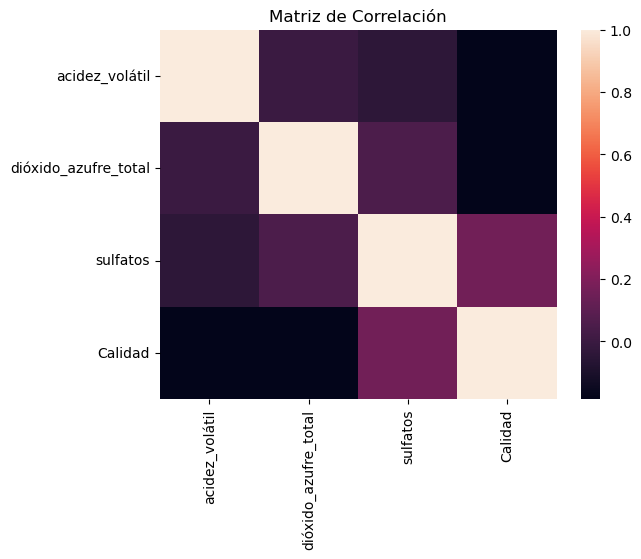

In [63]:
#Matriz de correlacion entre columnas de un conjunto de datos

sns.heatmap(Relacion_Datos)
plt.title('Matriz de Correlación')
plt.show()

en la anterior clase de Matriz se  puede evidenciar como basicamente existe la correlacion de "1.0" de el vino de tipo
"acidez_volátil" en junta con los demas factores de el vino como lo es "sulfatos" mas "dióxido_azufre_total" y su
respectiva "Calidad"

4  Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [65]:
X_train, X_test, y_train, y_test = train_test_split(Datos_de_prediccion, target, test_size=0.2, random_state=13)

In [67]:
print (X_train)

             acidez_volátil  dióxido_azufre_total  sulfatos  Calidad
acidez_fija                                                         
84                        6                  1110        66        5
107                       9                   990        68        5
76                       43                   660        64        5
81                       56                   560       128        5
71                       65                   400         6        5
...                     ...                   ...       ...      ...
65                      615                   180        65        5
63                       68                   540        66        6
97                       32                   830        82        5
73                       38                   350        47        5
124                      49                   990        10        6

[1279 rows x 4 columns]


In [69]:
# Este es un metodo de tipo de algoritmo que utiliza una estructura o diseño de un árbol para clasificar instancias
# de datos y valores según sus característicos o propiedades en manera de capaz clasifica los datos y valores en múltiples clases en un conjunto de datos.
Clasificacion_Datos = DecisionTreeClassifier()

In [71]:
print (y_train)


              Ph
acidez_fija     
84           315
107          322
76            34
81           311
71           344
...          ...
65           346
63           351
97           328
73           333
124          316

[1279 rows x 1 columns]


In [75]:
# este es un tipo de metodo que ajusta (o entrena) un modelo a los datos que se le proporcionan Básicamente 
# por medio de una clase de analisis o consulta en concreto los cuales estan almacenados en una Base de datos

Crear_Arbol = Clasificacion_Datos.fit(X_train, y_train)

[Text(0.6195265202652234, 0.9852941176470589, 'x[2] <= 178.5\ngini = 0.98\nsamples = 1279\nvalue = [5.0, 17.0, 34.0, 48.0, 32.0, 11.0, 7.0, 1.0, 1.0\n1.0, 1.0, 1.0, 1.0, 4.0, 4.0, 3.0, 2.0, 3.0, 2.0\n4.0, 5.0, 5.0, 8.0, 6.0, 7.0, 10.0, 8.0, 8.0, 9.0\n17.0, 8.0, 14.0, 25.0, 27.0, 21.0, 23.0, 21.0, 34.0\n29.0, 28.0, 25.0, 20.0, 42.0, 31.0, 26.0, 37.0, 30.0\n39.0, 30.0, 38.0, 31.0, 50.0, 25.0, 36.0, 38.0, 22.0\n29.0, 14.0, 22.0, 14.0, 16.0, 15.0, 15.0, 8.0, 14.0\n13.0, 13.0, 13.0, 8.0, 9.0, 10.0, 8.0, 6.0, 3.0, 4.0\n3.0, 3.0, 3.0, 5.0, 4.0, 3.0, 3.0, 1.0, 2.0, 1.0\n2.0]'),
 Text(0.6184084210339166, 0.9558823529411765, 'x[0] <= 60.0\ngini = 0.98\nsamples = 1276\nvalue = [5.0, 17.0, 34.0, 48.0, 32.0, 11.0, 7.0, 1.0, 1.0\n1.0, 1.0, 1.0, 1.0, 4.0, 4.0, 0.0, 2.0, 3.0, 2.0\n4.0, 5.0, 5.0, 8.0, 6.0, 7.0, 10.0, 8.0, 8.0, 9.0\n17.0, 8.0, 14.0, 25.0, 27.0, 21.0, 23.0, 21.0, 34.0\n29.0, 28.0, 25.0, 20.0, 42.0, 31.0, 26.0, 37.0, 30.0\n39.0, 30.0, 38.0, 31.0, 50.0, 25.0, 36.0, 38.0, 22.0\n29.0, 14.0, 

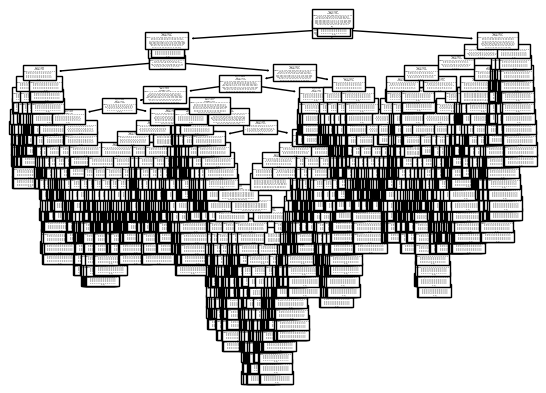

In [73]:
# Ejecucion de el arbol de decisiones  esta es una función que genera una representación gráfica de un árbol de decisión,
# mostrando cómo se dividen los datos en cada nodo según las características seleccionadas

plot_tree(Crear_Arbol)

In [78]:
#-evaluacion mas comparacion de las predicciones en distintos Valores, despues de haber creado o hecho
#El arbol de decisiones porque el metodo Predict() es una función que predice resultados para nuevos datos basándose en un modelo entrenado

predicciones = Crear_Arbol.predict(X_train)
print (predicciones)

[315 322  34 ... 328 333 316]


In [79]:
#la función pd.crosstab() de la biblioteca pandas se utiliza para crear tablas de contingencia o tablas cruzadas,
#que muestran la frecuencia (conteo) de combinaciones entre dos o más variables categóricas
#en este caso muestra en este siguiente resultado la combinacion de datos y valores segun las Predicciones de datos de
#Cada una de las columnas o campos de de esta tabla de la base de datos  de "Vino tinto" --> (acidez_volátil,dióxido_azufre_total,sulfatos,Calidad)

pd.crosstab(np.array([y[0] for y in y_train.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,29,30,31,32,33,34,35,36,39,274,...,367,368,369,371,372,374,375,378,385,401
Actual,,,,,,,,,,,,,,,,,,,,,
29,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,0,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,0,0,0,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,44,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [86]:
# esta funcion permite y ejecuta mas mide la capacidad del clasificador o de la agrupacion de los datos o valores
#Almacenados en estas columnas de esta tabla de esta Base de datos "Vino Tinto" para encontrar todos los casos relevantes
#dentro de un conjunto de datos

Datos_Relevantes = recall_score(y_train, predicciones, average='weighted')
Datos_Relevantes

1.0

In [88]:
#Este tipo de metodo se usa para evaluar el rendimiento de modelos de clasificación y agrupacion de datos,
#Esta función calcula la precisión del modelo, que es la proporción de predicciones correctas realizadas sobre el total de predicciones
#Aca se nuestra tambien cual es ese otro dato con mayor importancia y relevancia en los resultados de las Predicciones
accuracy = accuracy_score(y_train,predicciones)
accuracy

1.0